In [35]:
# Are there any data quality issues present?
# Are there any fields that are challenging to understand?

import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load the data
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
user = pd.read_csv('USER_TAKEHOME.csv')

In [37]:
# Look at the top 3 records
products.head(3)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11


In [38]:
# Look at the top 3 records
transactions.head(3)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,


In [39]:
# Look at the top 3 records
user.head(3)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None
            BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13

Missing Values in Products:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

Duplicate Rows in Products:
215


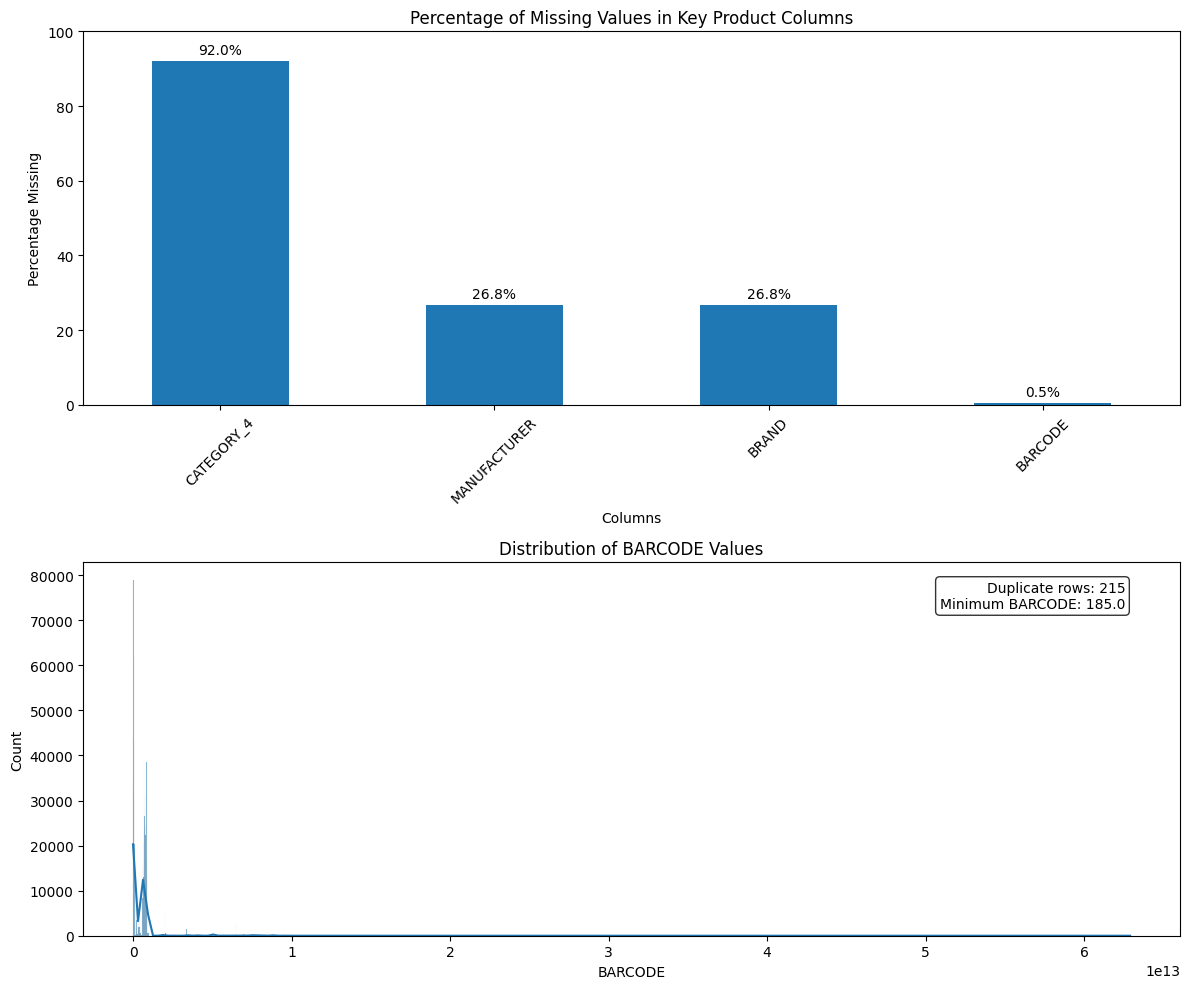

count    8.415270e+05
mean     6.016109e+11
std      1.022530e+12
min      1.850000e+02
25%      7.124923e+10
50%      6.344185e+11
75%      7.683955e+11
max      6.291108e+13
Name: BARCODE, dtype: float64


In [40]:
# Explore the Products data
print("Products Data:")
print(products.info())
print(products.describe())
# Check for missing values
print("\nMissing Values in Products:")
print(products.isnull().sum())
# Check for duplicate rows
print("\nDuplicate Rows in Products:")
print(products.duplicated().sum())


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the products dataframe is already loaded as 'products'

# Calculate percentage of missing values
missing_percentages = (products.isnull().sum() / len(products)) * 100

# Select key columns
key_columns = ['CATEGORY_4', 'MANUFACTURER', 'BRAND', 'BARCODE']
missing_key = missing_percentages[key_columns].sort_values(ascending=False)

# Create the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Missing values plot
missing_key.plot(kind='bar', ax=ax1)
ax1.set_title('Percentage of Missing Values in Key Product Columns')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Percentage Missing')
ax1.set_ylim(0, 100)  # Set y-axis to go from 0 to 100%
for i, v in enumerate(missing_key):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
ax1.tick_params(axis='x', rotation=45)

# BARCODE distribution plot
sns.histplot(products['BARCODE'].dropna(), ax=ax2, kde=True)
ax2.set_title('Distribution of BARCODE Values')
ax2.set_xlabel('BARCODE')
ax2.set_ylabel('Count')

# Add text about duplicates and unusual values
duplicate_count = products.duplicated().sum()
min_barcode = products['BARCODE'].min()
ax2.text(0.95, 0.95, f'Duplicate rows: {duplicate_count}\nMinimum BARCODE: {min_barcode}',
         transform=ax2.transAxes, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print additional statistics
print(products['BARCODE'].describe())


Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None
            BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12

Missing Values in Transactions:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY

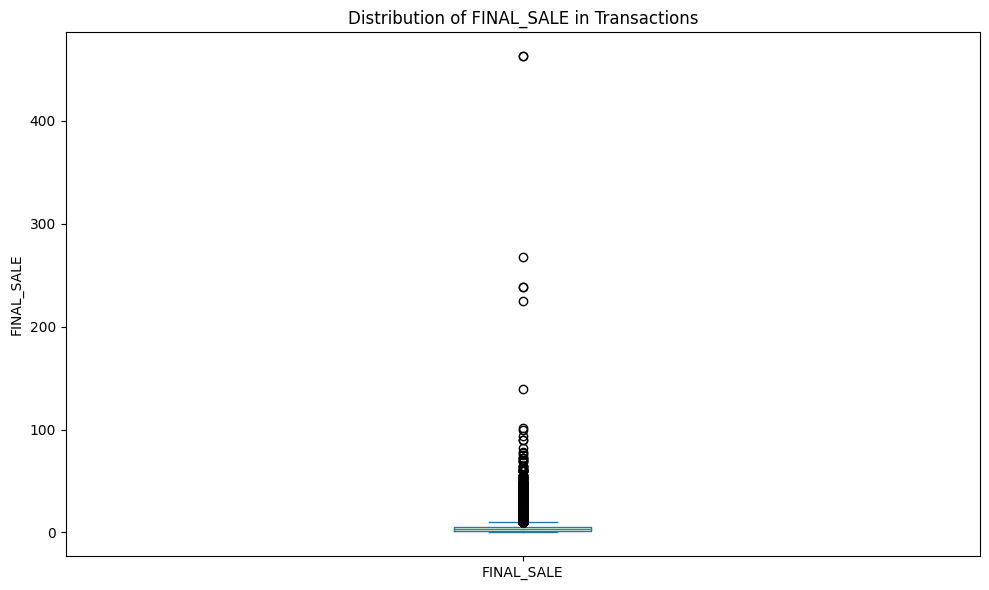

count    37500.000000
mean         4.576384
std          6.625663
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE, dtype: float64


In [41]:
# Explore the Transactions data
print("\nTransactions Data:")
print(transactions.info())
print(transactions.describe())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())
print("\nDuplicate Rows in Transactions:")
print(transactions.duplicated().sum())


# Convert FINAL_SALE to numeric, coercing errors to NaN
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')

# Create a box plot of FINAL_SALE
plt.figure(figsize=(10, 6))
transactions['FINAL_SALE'].plot(kind='box')
plt.title('Distribution of FINAL_SALE in Transactions')
plt.ylabel('FINAL_SALE')
plt.tight_layout()
plt.show()

# Print summary statistics
print(transactions['FINAL_SALE'].describe())


User Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None
                              ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       BIRTH_DATE  STATE LANGUAGE  GENDER  
count                       96325  95188    69492   94108  
unique                      54721     52        2     

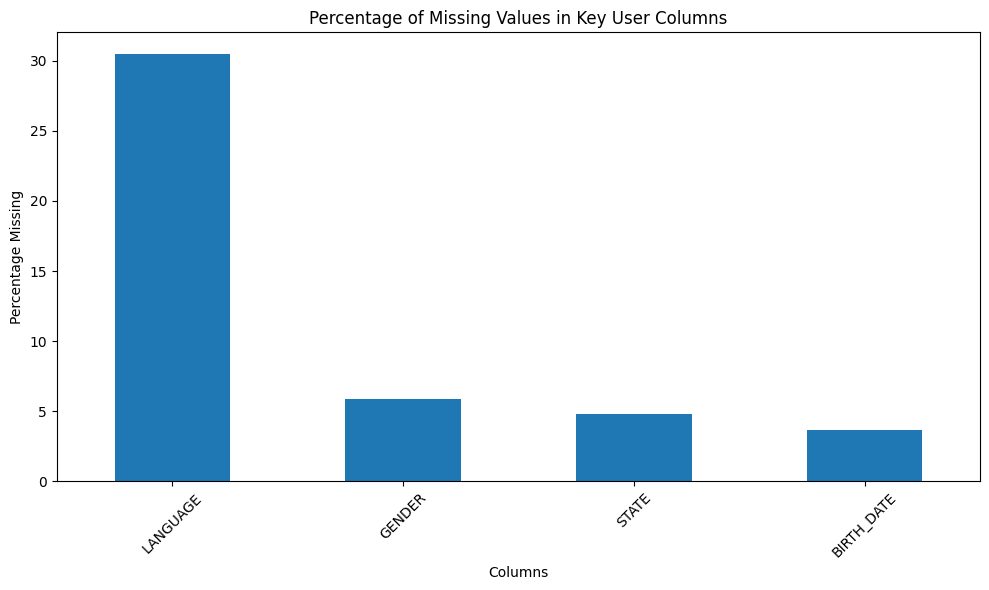

In [42]:
# Explore the User data
print("\nUser Data:")
print(user.info())
print(user.describe())
print("\nMissing Values in User:")
print(user.isnull().sum())
print("\nDuplicate Rows in User:")
print(user.duplicated().sum())


# Calculate percentage of missing values
missing_percentages = (user.isnull().sum() / len(user)) * 100

# Select key columns
key_columns = ['BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER']
missing_key = missing_percentages[key_columns].sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(10, 6))
missing_key.plot(kind='bar')
plt.title('Percentage of Missing Values in Key User Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# What are the top 5 brands by receipts scanned among users 21 and over?

import pandas as pd
from datetime import datetime

# Current date for age calculation
current_date = datetime.now()

# Function to calculate age
def calculate_age(birth_date):
    birth_date = pd.to_datetime(birth_date)
    age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
    return age

# Merge transactions and products data
trans_products_df = pd.merge(transactions, products, on='BARCODE', how='inner')

# Merge the result with user data
merged_df = pd.merge(trans_products_df, user, left_on='USER_ID', right_on='ID', how='inner')

# Calculate age for each user
merged_df['AGE'] = merged_df['BIRTH_DATE'].apply(calculate_age)

# Filter for users 21 and over
merged_df_filtered = merged_df[merged_df['AGE'] >= 21]

# Group by brand and count receipts
top_brands = merged_df_filtered.groupby('BRAND')['RECEIPT_ID'].count().sort_values(ascending=False)

# Get the top 5 brands
top_5_brands = top_brands.head(5)

print("Top 5 Brands by Receipts Scanned (Users 21 and over):")
print(top_5_brands)

Top 5 Brands by Receipts Scanned (Users 21 and over):
BRAND
COCA-COLA                    628
ANNIE'S HOMEGROWN GROCERY    576
DOVE                         558
BAREFOOT                     552
ORIBE                        504
Name: RECEIPT_ID, dtype: int64


In [44]:
# What are the top 5 brands by sales among users that have had their account for at least six months?

import pandas as pd
from datetime import datetime

# Current date for account age calculation (timezone-naive)
current_date = datetime.now().replace(tzinfo=None)

# Function to calculate account age in months
def calculate_account_age_months(created_date):
    if pd.isnull(created_date):
        return None
    # Ensure the created_date is timezone-naive
    created_date = created_date.replace(tzinfo=None)
    return (current_date - created_date).days // 30

# Convert 'CREATED_DATE' to datetime and calculate the account age in months for each user
user['CREATED_DATE'] = pd.to_datetime(user['CREATED_DATE'], errors='coerce')
user['ACCOUNT_AGE_MONTHS'] = user['CREATED_DATE'].apply(calculate_account_age_months)

# Filter users who have had their account for at least six months
long_term_users = user[user['ACCOUNT_AGE_MONTHS'] >= 6]

# Merge transactions with long-term users
merged_df = transactions.merge(long_term_users, left_on='USER_ID', right_on='ID', how='inner')

# Merge with products to get brand information
merged_df = merged_df.merge(products, on='BARCODE', how='left')

# Convert 'FINAL_SALE' to numeric, handling any non-numeric values gracefully
merged_df['FINAL_SALE'] = pd.to_numeric(merged_df['FINAL_SALE'], errors='coerce')

# Calculate the top 5 brands by total sales
top_brands_sales = merged_df.groupby('BRAND')['FINAL_SALE'].sum().nlargest(5)

print("Top 5 Brands by Sales (Users with accounts 6+ months old):")
print(top_brands_sales)

Top 5 Brands by Sales (Users with accounts 6+ months old):
BRAND
COCA-COLA                    2592.10
ANNIE'S HOMEGROWN GROCERY    2383.92
DOVE                         2327.47
BAREFOOT                     2284.59
ORIBE                        2085.93
Name: FINAL_SALE, dtype: float64


In [45]:
# Which is the leading brand in the Dips & Salsa category?

'''
Assumptions
To determine the leading brand in the Dips & Salsa category, I'll make the following assumptions:

Definition of the Leading Brand: The leading brand is defined as the brand with the highest total sales in the Dips & Salsa category.

Sales Data: We will use the FINAL_SALE field from the transaction data to calculate total sales.

Product Categorization: We'll filter the products that fall specifically under the Dips & Salsa category, using the relevant CATEGORY columns from the products dataset.

Analysis
Based on these assumptions, I'll analyze the sales data to identify the leading brand in the Dips & Salsa category. Let's proceed with the analysis.

The leading brand in the Dips & Salsa category is TOSTITOS, with total sales amounting to $103,354.84.

'''

# Filter products that fall under the 'Dips & Salsa' category in any of the CATEGORY columns
dips_salsa_products = products[
    products['CATEGORY_3'].str.contains('Dips & Salsa', case=False, na=False) |
    products['CATEGORY_2'].str.contains('Dips & Salsa', case=False, na=False) |
    products['CATEGORY_1'].str.contains('Dips & Salsa', case=False, na=False)
]

# Merge the dips and salsa products with the transactions data to get relevant sales data
dips_salsa_sales = transactions.merge(dips_salsa_products, on='BARCODE', how='inner')

# Convert 'FINAL_SALE' to numeric to handle any potential non-numeric values
dips_salsa_sales['FINAL_SALE'] = pd.to_numeric(dips_salsa_sales['FINAL_SALE'], errors='coerce')

# Calculate the total sales for each brand in the Dips & Salsa category
leading_brand_dips_salsa = dips_salsa_sales.groupby('BRAND')['FINAL_SALE'].sum().nlargest(1)

leading_brand_dips_salsa


,FINAL_SALE
BRAND,
TOSTITOS,103354.84
